Clustering algorithms help identify distinct groups of data. An example is to use clustering to group customers based on their behavior. There are many clustering algorithms, but the most commonly used algorithm is K-Means. In this video, I'll show you how to use K-Means clustering to find some underlying structure in your data. 

## Import Libraries

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [54]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Arrange Data into Features Matrix

K-Means is considered an unsupervised learning algorthm. This means you only need a features matrix. In the iris dataset, there are four features. In this notebook, the features matrix will only be two features as it is easier to visualize clusters in two dimensions. 

In [55]:
features = ['petal length (cm)','petal width (cm)']

# Create features matrix
X = df.loc[:, features].values

The variable y below is for demonstational purposes in this notebook and not needed if you want to do K-Means. 

In [56]:
y = data.target

## Standardize the Data
KMeans is effected by scale so you need to scale the features in the data before using KMeans. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. 

In [57]:
# Apply Standardization to features matrix X
X = df.loc[:, features].values

In [58]:
X = StandardScaler().fit_transform(X)

## Plot Data to Estimate Number of Clusters
If your data is 2 or three dimensional, it is a good idea to plot your data before clustering. Hopefully you can see if there are any natural looking clusters. 

Text(0.5, 1.0, 'Scatter Plot of the Two Features')

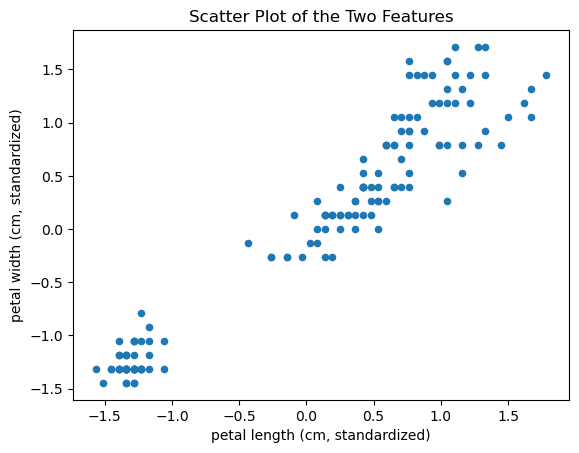

In [59]:
# Plot
pd.DataFrame(X, columns = features).plot.scatter('petal length (cm)','petal width (cm)' )

# Add labels
plt.xlabel('petal length (cm, standardized)')
plt.ylabel('petal width (cm, standardized)')
plt.title('Scatter Plot of the Two Features')

## KMeans Clustering
In K-Means clustering, you need to specify the number of clusters (k) you want. In Scikit-Learn, this parameter is called `n_clusters`. In the case of the code below, the number of clusters is set to 3 because most people who use the Iris dataset happen to know there are three species. 

In [60]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [61]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Visually Evaluate the Clusters

In [62]:
X = pd.DataFrame(X, columns = features)

Text(0, 0.5, 'petal width (cm)')

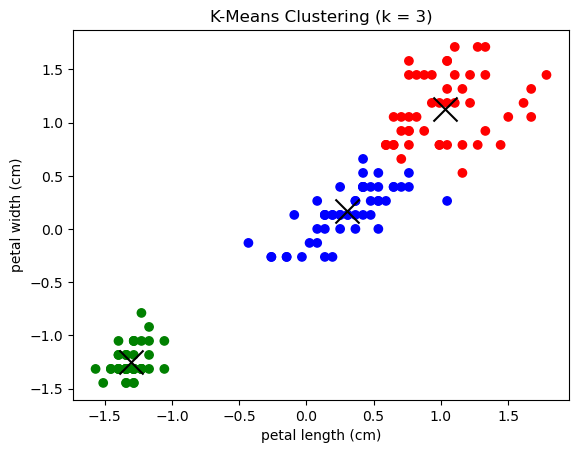

In [63]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')
plt.title('K-Means Clustering (k = 3)')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

## Visually Evaluate the Clusters and Compare Species

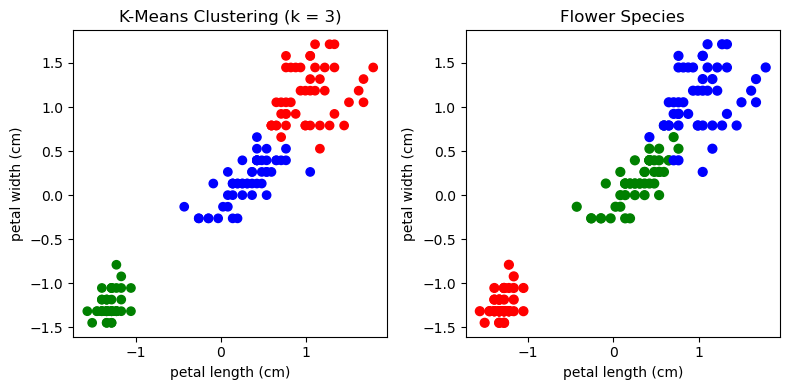

In [64]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('K-Means Clustering (k = 3)')

plt.subplot(1, 2, 2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Flower Species')

plt.tight_layout()

They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels. The colors are different in the two graphs simply because KMeans gives out a arbitrary cluster number and the iris dataset has an arbitrary number in the target column. 